<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:#0097da;overflow:hidden;font-weight:800">Medical Costs</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-costs/medical_costs.csv


## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:80px;font-size:110%;text-align: center'>1  |  About This Kernel</div></b>

**This dataset contains detailed information about medical costs for individuals over the period from 2010 to 2020. It includes various attributes such as age, sex, BMI, number of children, smoking status, and region. These attributes are essential in understanding the factors that influence medical costs and can be used for predictive modeling, statistical analysis, and research purposes.**

**Dataset Features:**

* Age: The age of the individual (ranging from 18 to 65 years).
* Sex: Gender of the individual (male or female).
* BMI: Body Mass Index of the individual, indicating the level of obesity (ranging from 15 to 40).
* Children: Number of children covered by health insurance (ranging from 0 to 5).
* Smoker: Smoking status of the individual (yes or no).
* Region: Residential area in the US (northeast, northwest, southeast, southwest).
* Medical Cost: Annual medical costs incurred by the individual (in USD).

**This dataset is a comprehensive collection of 10,000 records, providing a robust foundation for various data analysis tasks. It is especially useful for data scientists, researchers, and students who aim to explore and predict medical costs based on different demographic and lifestyle factors.**

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:80px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import locale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Download Dataset</div></b>

In [3]:
#Read data from a csv file
df = pd.read_csv('/kaggle/input/medical-costs/medical_costs.csv')

In [4]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (10000, 7)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Age,int64,0,0.0,0,48,10000,18.0,65.0,41.6784,13.807724,58,24,50
Sex,object,0,0.0,0,2,10000,NaN,NaN,NaN,NaN,male,male,male
BMI,float64,0,0.0,0,251,10000,15.0,40.0,27.40301,7.22896,15.6,29.8,29.0
Children,int64,0,0.0,0,6,10000,0.0,5.0,2.5017,1.701672,2,0,5
Smoker,object,0,0.0,0,2,10000,NaN,NaN,NaN,NaN,yes,yes,no
Region,object,0,0.0,0,4,10000,NaN,NaN,NaN,NaN,northwest,northeast,northwest
Medical Cost,float64,0,0.0,0,9912,10000,3617.09,20268.21,11898.932216,6073.875834,17907.54,16312.64,6819.21


<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>No Missing and No Duplicats data</div>

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 10000
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [7]:
cat_cols, num_cols, cat_but_car

(['Sex', 'Smoker', 'Region', 'Children'], ['Age', 'BMI', 'Medical Cost'], [])

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

         Sex  Ratio
Sex                
female  5034  50.34
male    4966  49.66


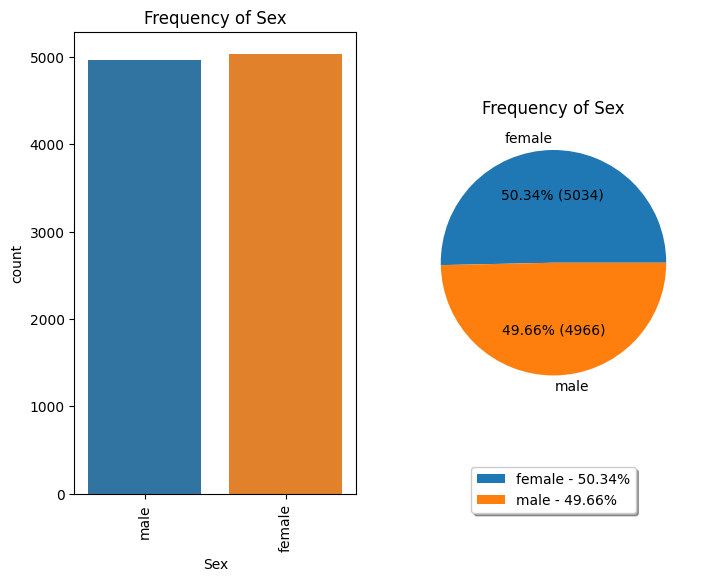

        Smoker  Ratio
Smoker               
no        5008  50.08
yes       4992  49.92


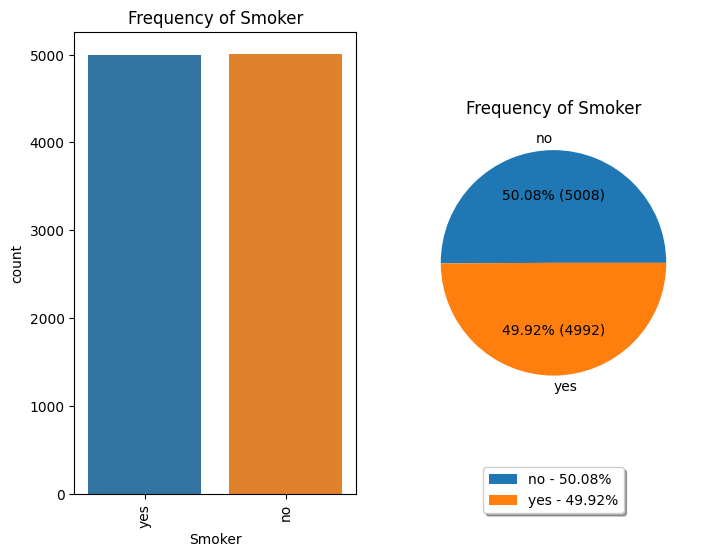

           Region  Ratio
Region                  
southwest    2521  25.21
northeast    2514  25.14
northwest    2486  24.86
southeast    2479  24.79


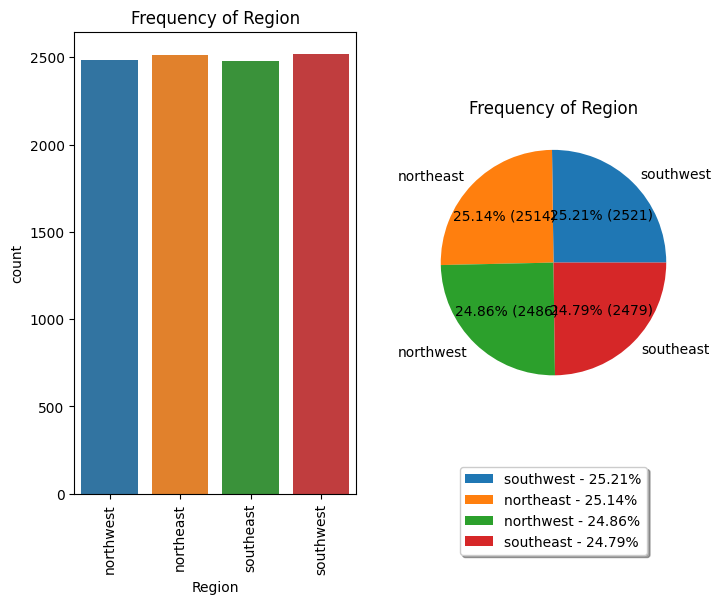

          Children  Ratio
Children                 
2             1692  16.92
1             1683  16.83
3             1679  16.79
5             1665  16.65
4             1647  16.47
0             1634  16.34


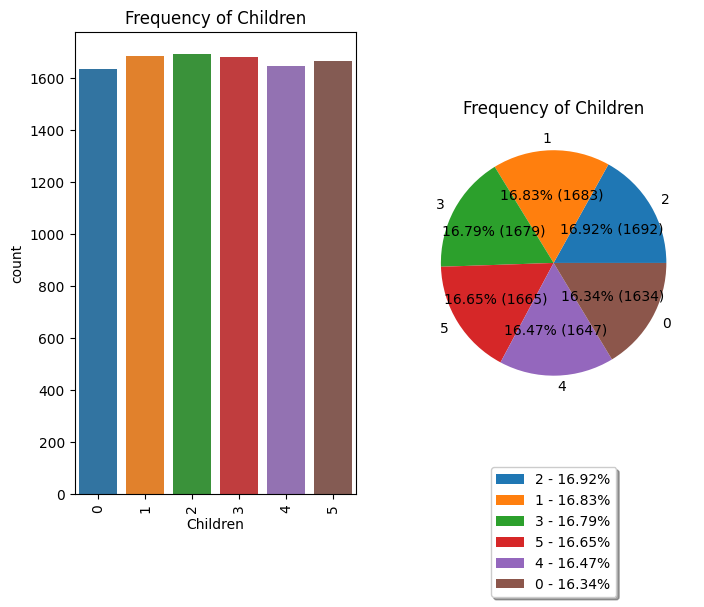

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

Age
count    10000.000000
mean        41.678400
std         13.807724
min         18.000000
5%          20.000000
10%         23.000000
20%         27.000000
30%         32.000000
40%         37.000000
50%         42.000000
60%         47.000000
70%         51.000000
80%         56.000000
90%         61.000000
95%         63.000000
99%         65.000000
max         65.000000
Name: Age, dtype: float64


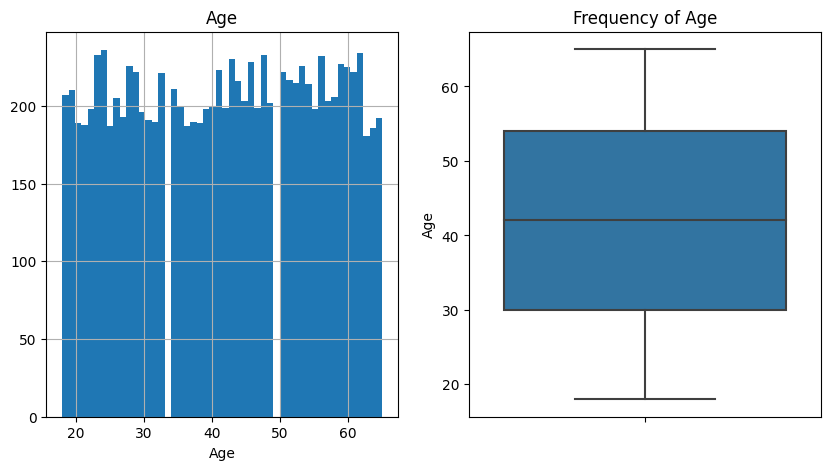

______________________________________________________

BMI
count    10000.00000
mean        27.40301
std          7.22896
min         15.00000
5%          16.20000
10%         17.40000
20%         19.80000
30%         22.40000
40%         24.90000
50%         27.40000
60%         29.80000
70%         32.30000
80%         34.90000
90%         37.50000
95%         38.70000
99%         39.70000
max         40.00000
Name: BMI, dtype: float64


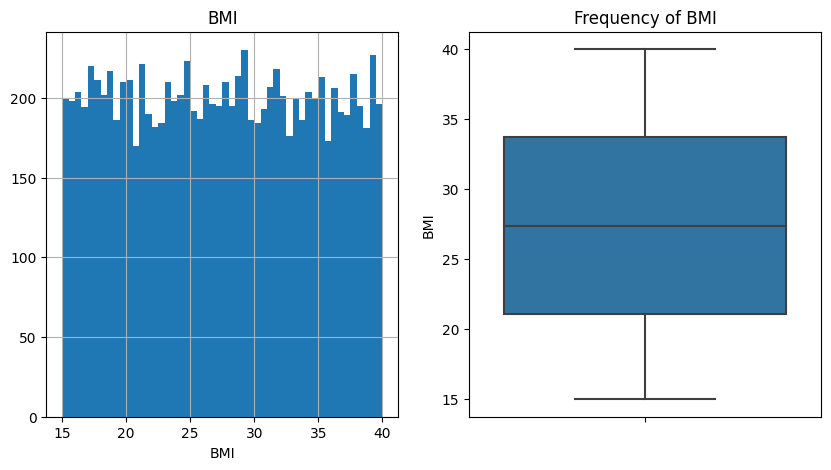

______________________________________________________

Medical Cost
count    10000.000000
mean     11898.932216
std       6073.875834
min       3617.090000
5%        4765.416000
10%       5122.556000
20%       5666.906000
30%       6139.435000
40%       6664.662000
50%       7957.430000
60%      17141.026000
70%      17680.024000
80%      18183.348000
90%      18698.059000
95%      19037.843000
99%      19562.964400
max      20268.210000
Name: Medical Cost, dtype: float64


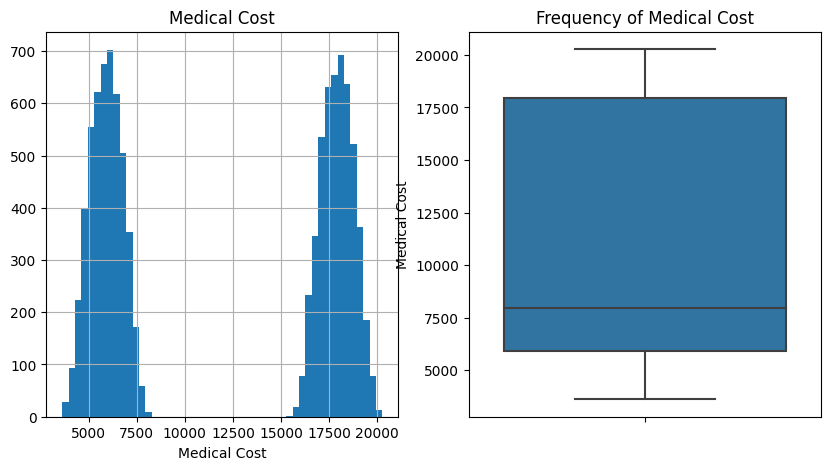

______________________________________________________



In [9]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>We can clearly see in the graph above that the "Medical Cost" is divided into two groups. The first group with costs between 3000 and 8000 and the second group with costs between 15000 and 20000 approximately. Let's try to identify why this is happening.</div>

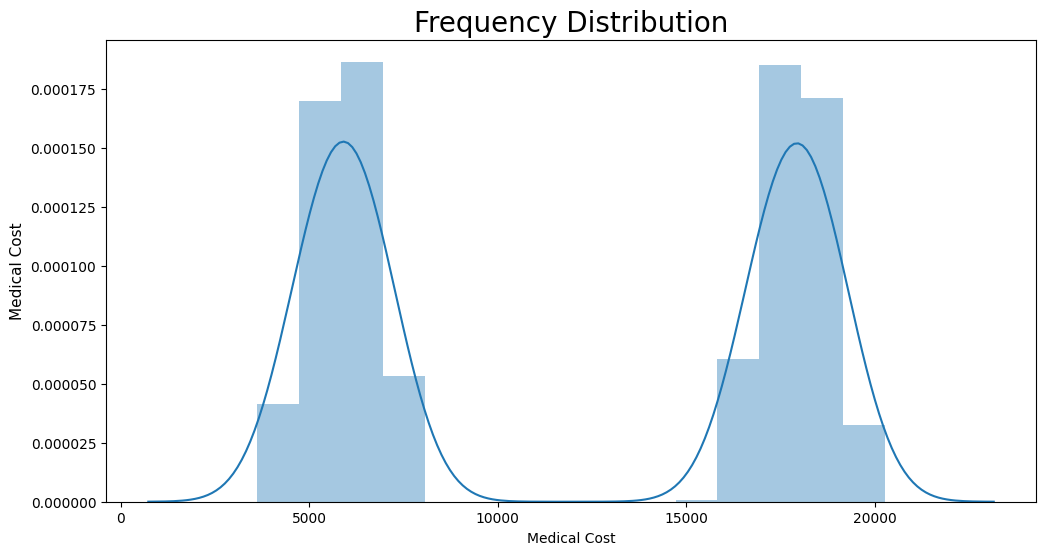

In [10]:
# Histogram - 'Medical Cost' 
ax = sns.distplot(df['Medical Cost'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_ylabel('Medical Cost', fontsize=11)
plt.show()

In [11]:
# Transform object columns into numeric ones.

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [12]:
cols = ['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region']

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Let's plot all the features with Medical Cost.</div>

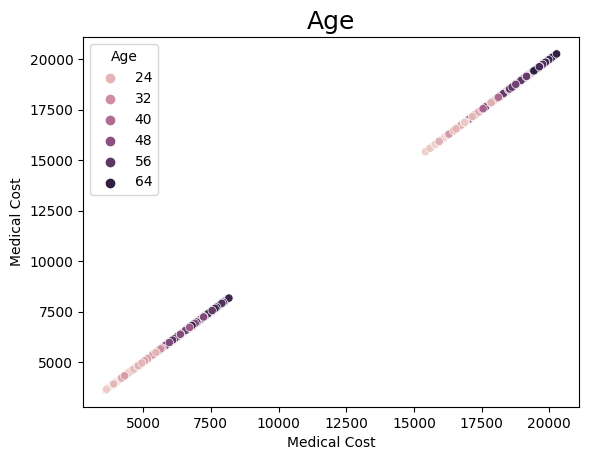

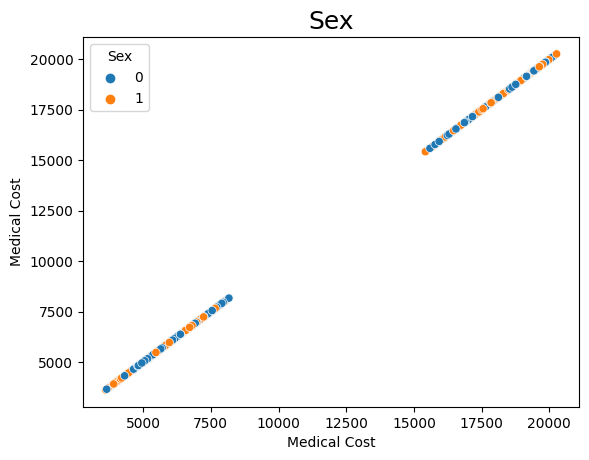

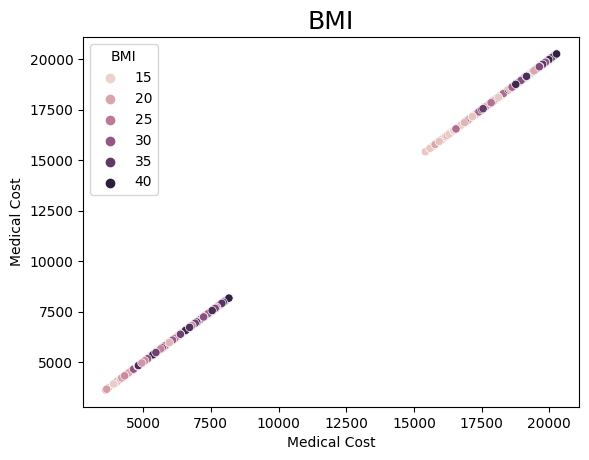

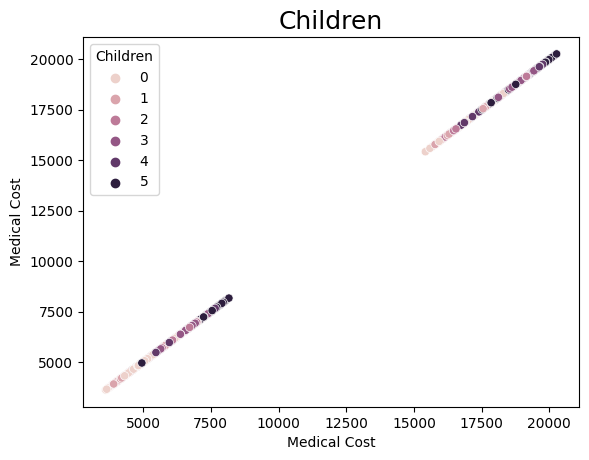

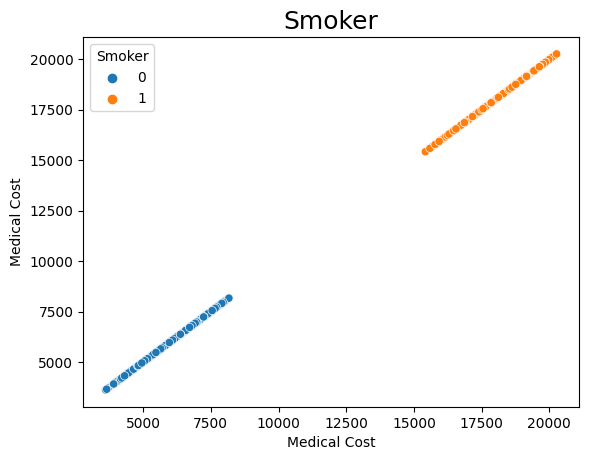

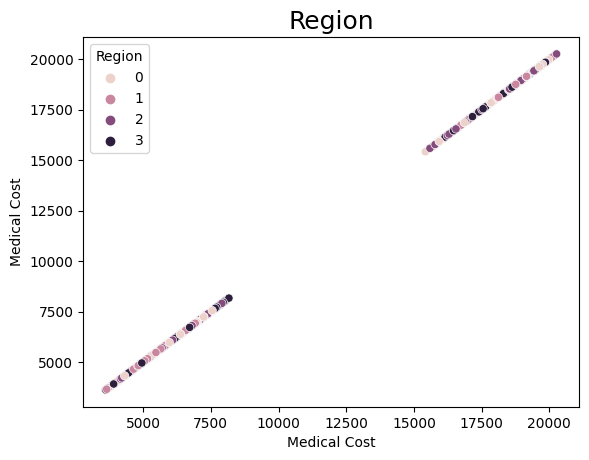

In [13]:
for i in cols:
    
    if i == 'Age':
        sns.scatterplot(data=df, x="Medical Cost", y="Medical Cost", hue="Age")
        plt.title("Age", fontsize = 18)
        plt.show()
    else:
        sns.scatterplot(data=df, x="Medical Cost", y="Medical Cost", hue=i)
        plt.title(i, fontsize = 18)
        plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>It is clear that the only feature that is divided into the two groups is 'Smoker'. Look at the colors. Let's check this with a boxplot and the heatmap.
</div>

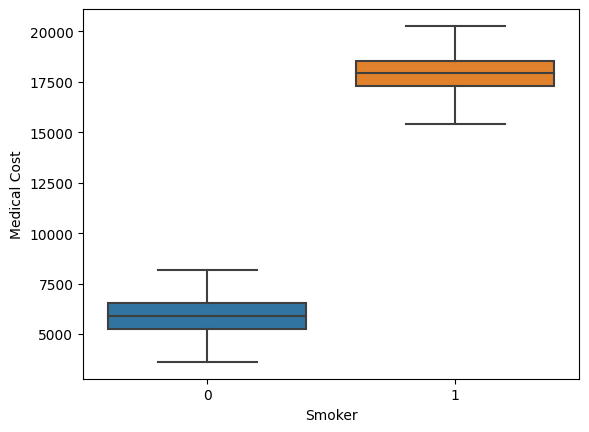

In [14]:
sns.boxplot(x = 'Smoker', y = 'Medical Cost', data = df)
plt.show()

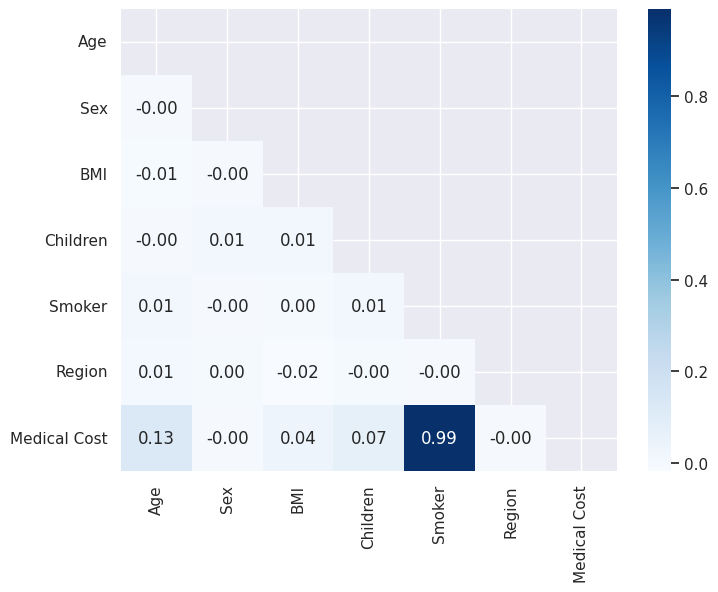

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (8, 6)})
sns.heatmap(corr, mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

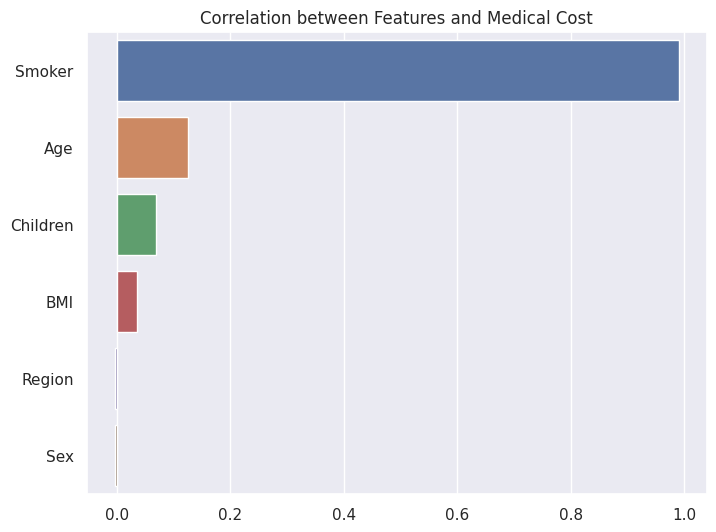

In [16]:
# Correlation

limite = -1

data = df.corr()["Medical Cost"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limite:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlation between Features and Medical Cost')
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>It is now very clear that the feature that has a high correlation with 'Medical Cost' is 'Smoker'. Age also has a little correlation, but much smaller. The rest are practically non-existent.
</div>

In [17]:
# Eliminate empty spaces in column names.
df.columns = df.columns.str.replace(' ', '_') 

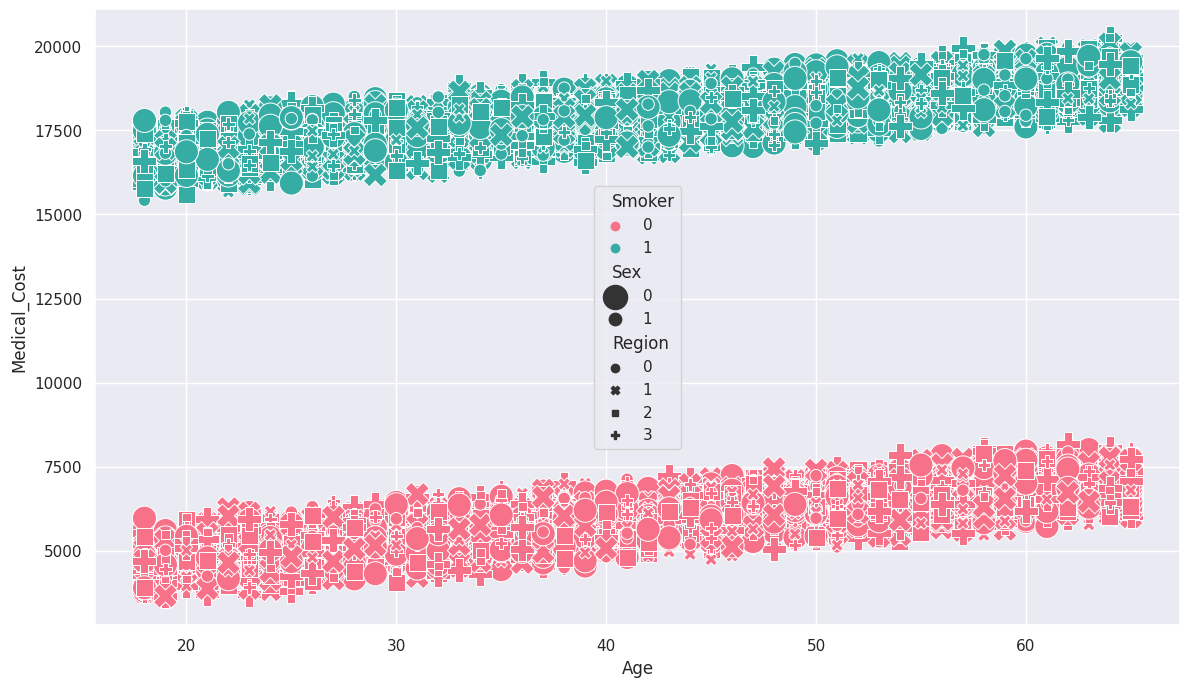

In [18]:
sns.set(rc={'figure.figsize':(14,8)})
sns.scatterplot(x=df.Age, y=df.Medical_Cost, size=df.Sex, hue=df.Smoker, style=df.Region, sizes=(80,300), palette=("husl"))
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#0097da;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Once again, we see that "Medical Cost" is heavily influenced by "Smoker". It is also possible to see the influence of "Age". As the "Age" rises, the "Medical Cost" also rises.
</div>

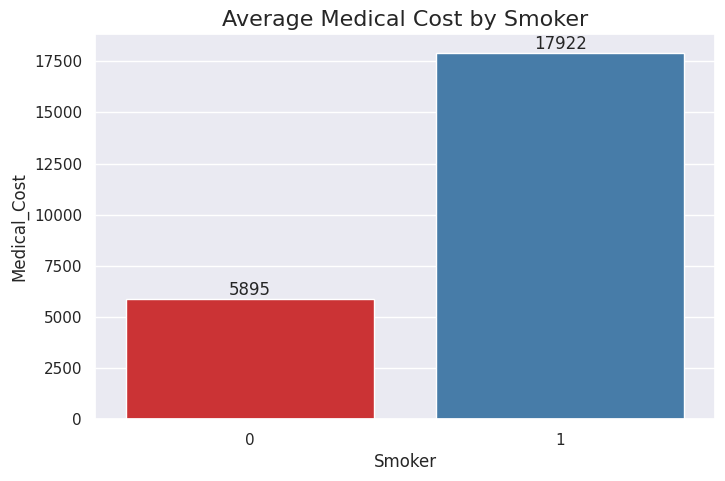

In [19]:
# Average Medical Cost by Smoker
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x="Smoker", y="Medical_Cost", errorbar=None, palette="Set1")
plt.title("Average Medical Cost by Smoker", fontsize = 16)
ax.bar_label(ax.containers[0], fmt='%0.0f', rotation = 0, fontsize = 12)
plt.xticks(rotation = 0);
plt.show()

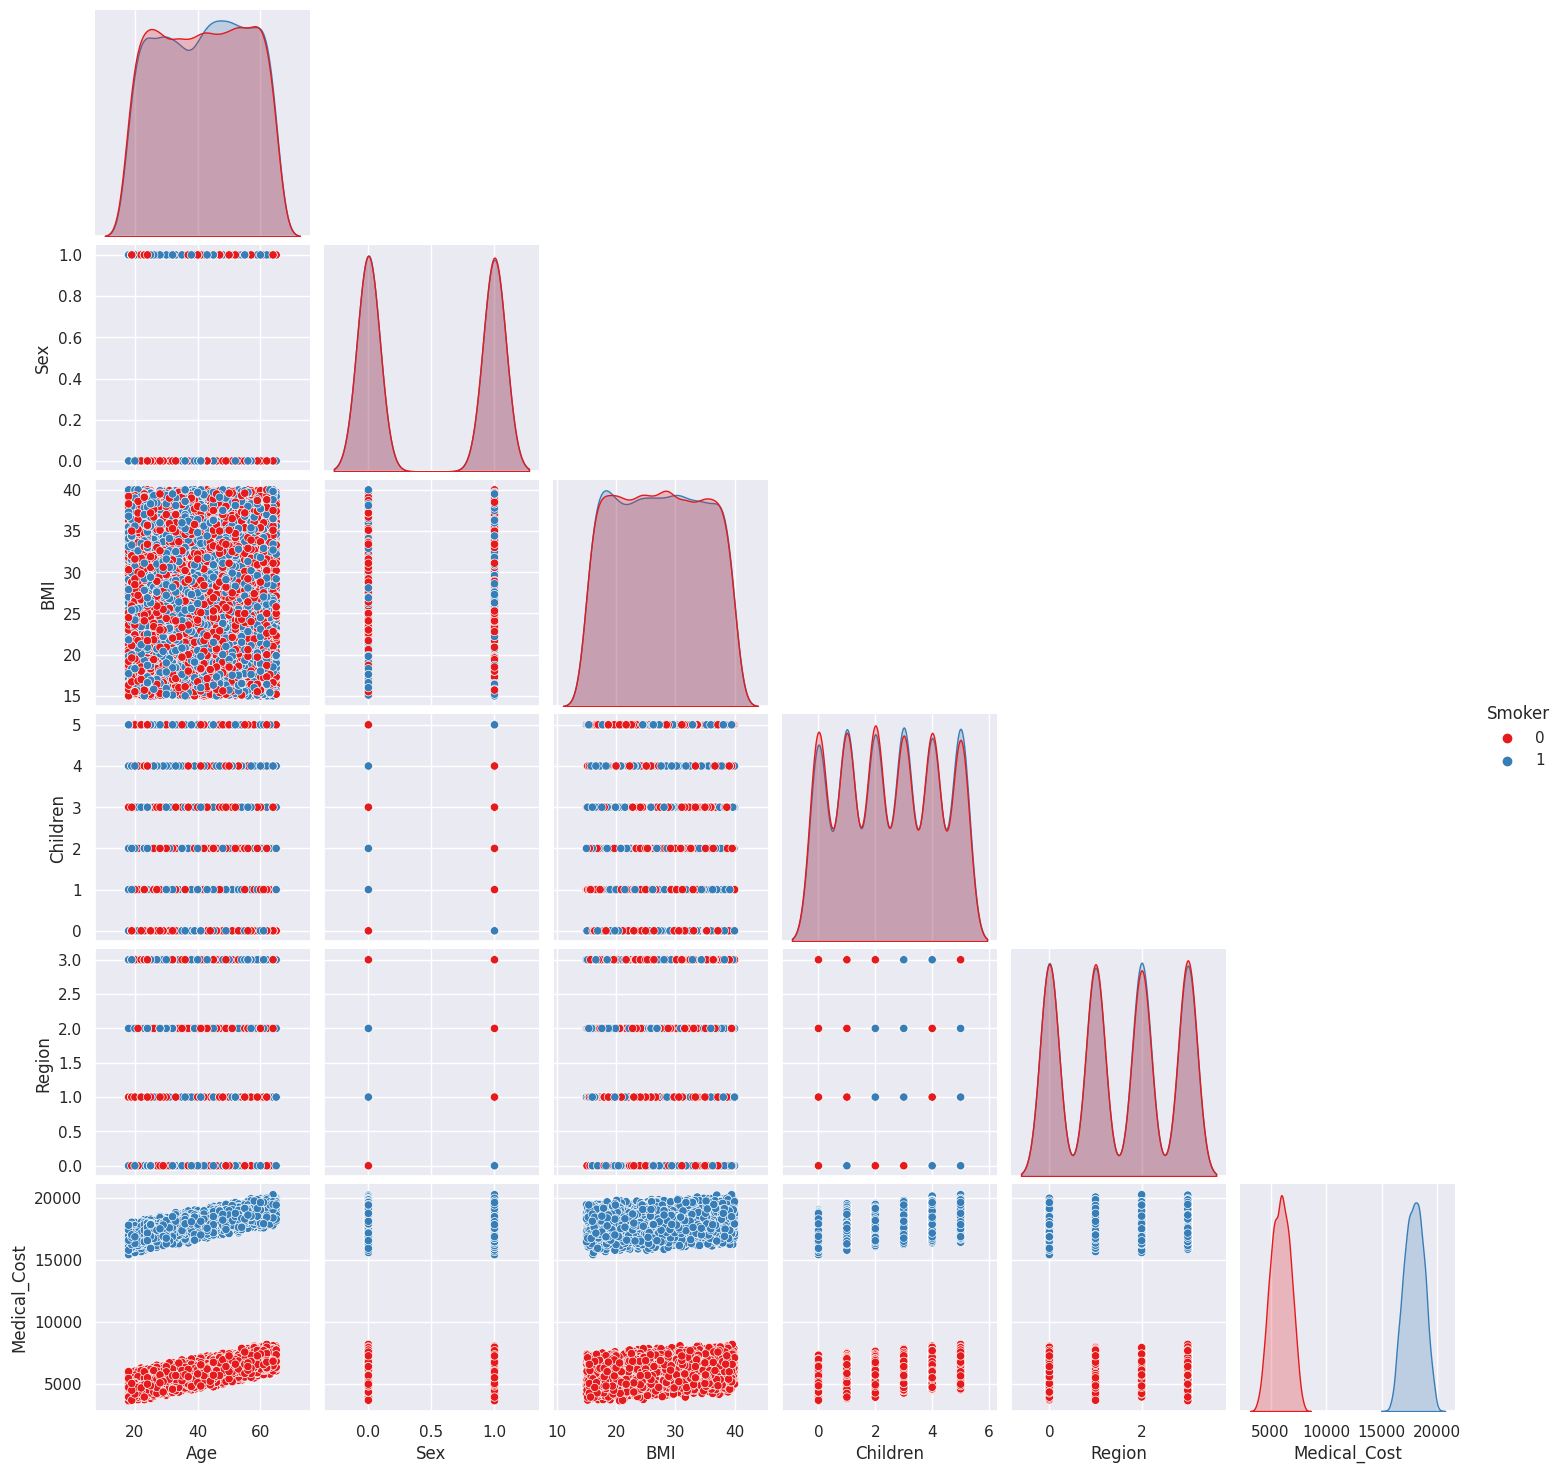

In [20]:
sns.pairplot(df, hue="Smoker", palette="Set1", corner=True)
plt.show()

# <font color=#0097da style='font-size: 18px;'>In conclusion, we can state that the "Medical Cost" for smokers is much higher than for non-smokers. We can also say that as the "Age" increases, the "Medical Cost" also increases.</font>

## <b><div style='padding:15px;background-color:#0097da;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked this code, consider upvoting it. Thank you.</div></b>